In [1]:
# Dependencies and Setup
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

#Load data file
aug_test = "Data Files/aug_test.csv"

#Read August Data and store into DataFrame
August_Test = pd.read_csv(aug_test)

In [2]:
# View Data Headers for August Test File
August_Test_df = pd.read_csv(aug_test)
August_Test_df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [3]:
#Load August Train Data File
aug_train = "Data Files/aug_train.csv"

# View Data Headers for August Train File 
August_Train_df = pd.read_csv(aug_train)
August_Train_df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [4]:
#Load Sample Submission Sample Data File
sample_submission = "Data Files/sample_submission.csv"

# View Data Headers for Sample Submission File
Sample_Submission_df = pd.read_csv(sample_submission)
Sample_Submission_df.head()

,enrollee_id,target
0,32403,0.5
1,9858,0.5
2,31806,0.5
3,27385,0.5
4,27724,0.5


In [5]:
# create a sample dataframe with x amount of random rows

august_sample_df = August_Train_df.sample(1000)




In [6]:

# use dropna to remove rows with Nan values from dataframe

dropped_df = august_sample_df.dropna()
dropped_df

# reset index of dropped df for enrolee id
dropped_df.reset_index(inplace=True)
del dropped_df['index']
dropped_df.head()


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,16242,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,10,1000-4999,Pvt Ltd,4,50,0.0
1,23939,city_114,0.926,Male,No relevent experience,Full time course,Graduate,STEM,7,10/49,Public Sector,4,46,0.0
2,15994,city_105,0.794,Male,Has relevent experience,no_enrollment,Masters,STEM,17,100-500,Pvt Ltd,>4,10,0.0
3,16055,city_36,0.893,Male,Has relevent experience,no_enrollment,Graduate,STEM,10,100-500,Pvt Ltd,1,127,0.0
4,18582,city_83,0.923,Male,Has relevent experience,no_enrollment,Masters,STEM,9,10000+,Pvt Ltd,4,170,0.0


In [7]:
# check sample dataframe for duplicate enrollee_id

# Get the total number of enrollee
id_value = dropped_df["enrollee_id"].value_counts()
id_value_count = len(id_value)
id_value_count

# Getting the duplicate mice by ID number that shows up for enrollee ID.
dupe_enrollee = dropped_df.loc[dropped_df.duplicated
                                    (subset='enrollee_id'),'enrollee_id'].unique()

#print "there are x enrolees and y duplicates"
print(f'There are {id_value_count} enrollees and {dupe_enrollee} duplicates.')

There are 469 enrollees and [] duplicates.


In [8]:
# use dropped_df to perform test analysis


In [9]:
#Training Hours vs. Target [Job Change = 1, No Job Change = 0]
#1.Create Data Frame
#2.Describe the data to gain any additional informaiton.
#3.Compare the 
#4.


In [10]:
#1. Create the Data Frame for target
# targ_train=dropped_df[["target","training_hours"]]
# targ_train
Jourdans_df=dropped_df[["target","training_hours"]]
train_hrs = dropped_df["training_hours"]
train_hrs
#Jourdans_part

0       50
1       46
2       10
3      127
4      170
      ... 
464     35
465     10
466     12
467     82
468     50
Name: training_hours, Length: 469, dtype: int64

# Create new bin


In [11]:
#Create bins for training hours...***NEED COUNT OF 1 AND 0'S IN BIN**...
thours_bin = [0,42.9,83.9,124.9,165.9,206.9,247.9,288.9,330.9]

#Bin Group Names
thours_groups = ["0-42.9","43-83.9","84-124.9","125-165.9","166-206.9","207-247.9","248-288.9","289-330"]

Jourdans_df["Training Hrs Group"]=pd.cut(Jourdans_df['training_hours'],thours_bin, labels = thours_groups)



C:\Users\19196\.conda\envs\pythondata\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [12]:
#Jourdans_BG = Jourdans_df.groupby(["Training Hrs Group"]).count()['target']
training_hrs_bin = Jourdans_df.groupby(["Training Hours Groups"])
#Jourdans_BG["# of Job Seekers"]= Jourdans_df["target"].sum()
training_hrs_bin.sum()
# training_hrs_bin.count()
#Jourdans_BG.mean()
#Jourdans_BG
#Jourdans_BG.plot(kind="bar", figsize(10,5))  

#plt.show()
#Jourdans_df
# thours = Jourdans_df.groupby(["thours_groups"],["thours_bin"])
# # thours.plot(kind="bar",figsize =(10,5))
# # plt.show()
# #plt.pie()
# 

,target,training_hours
Training Hrs Group,,
0-42.9,33.0,4853
43-83.9,18.0,7540
84-124.9,8.0,6270
125-165.9,5.0,4453
166-206.9,1.0,3599
207-247.9,1.0,1552
248-288.9,1.0,1362
289-330,0.0,314


In [13]:
training_hrs_bin_count = training_hrs_bin.count().reset_index()
training_hrs_bin_sum = training_hrs_bin.sum().reset_index()
training_hrs_bin_sum
training_hrs_bin_count

,Training Hrs Group,target,training_hours
0,0-42.9,212,212
1,43-83.9,129,129
2,84-124.9,63,63
3,125-165.9,31,31
4,166-206.9,20,20
5,207-247.9,7,7
6,248-288.9,5,5
7,289-330,1,1


In [26]:


training_hrs_bin_sum["Job Seeker %"] = (training_hrs_bin_sum['target']/training_hrs_bin_count['target'])*100 
training_hrs_bin_sum

#training_hrs_bin.count()["target"]


,Training Hrs Group,target,training_hours,Job Seeker %
0,0-42.9,33.0,4853,15.566038
1,43-83.9,18.0,7540,13.953488
2,84-124.9,8.0,6270,12.698413
3,125-165.9,5.0,4453,16.129032
4,166-206.9,1.0,3599,5.000000
5,207-247.9,1.0,1552,14.285714
6,248-288.9,1.0,1362,20.000000
7,289-330,0.0,314,0.000000


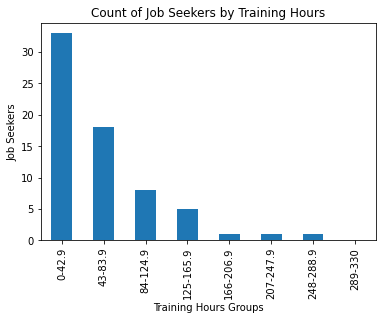

In [42]:
#Distribution of Job seekers
#group by training hour bins
#1. training_hrs_bin
#2. training_hrs_bin_sum
#3. training_hrs_bom_count

#job_seeker_hist

training_hrs_bin.sum()["target"].plot(kind="bar",title="Count of Job Seekers by Training Hours")

plt.xlabel("Training Hours Groups")
plt.ylabel("Job Seekers")
plt.savefig("Job Seekers by Training Groups")
plt.show()
# job_seeker_hist.set_xlabel()



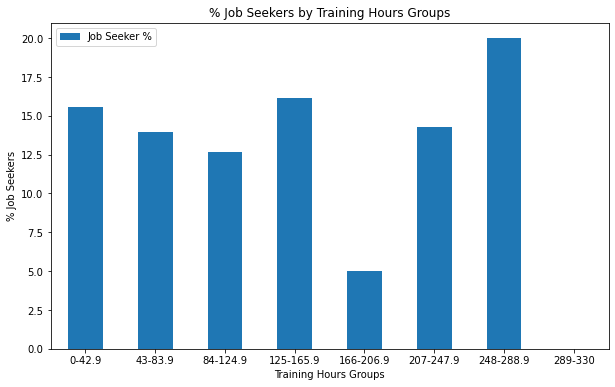

In [56]:
#Distribution of Job seekers
#group by training hour bins
#1. training_hrs_bin
#2. training_hrs_bin_sum
#3. training_hrs_bom_count

#job_seeker_hist
#ax = df.plot.bar(x='lab', y='val', rot=0)


training_hrs_bin_sum2 = training_hrs_bin_sum[["Training Hrs Group","Job Seeker %"]]
#training_hrs_bin_sum2

# training_hrs_bin_sum2.plot(kind="bar",title="Count of Job Seekers by Training Hours")
training_hrs_bin_sum2.plot.bar(x='Training Hrs Group', y='Job Seeker %', rot=0, figsize=(10,6))

plt.title("% Job Seekers by Training Hours Groups")
plt.xlabel("Training Hours Groups")
plt.ylabel("% Job Seekers")
plt.savefig("% Job Seekers by Training Groups")
plt.show()
# job_seeker_hist.set_xlabel()